### Importing the required libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading and analysing the data

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_African_countries_by_GDP_(nominal)"
tables = pd.read_html(url)

# Preview the first table
df = tables[0]

df.head()

,Rank,Country,Nominal GDP (million US$)[1],Population[1],Per capita (US$)[1]
0,1,South Africa,410338,64146000,6397
1,2,Egypt,347342,109450000,3174
2,3,Algeria,268885,47251000,5690
3,4,Nigeria,188271,233343000,807
4,5,Morocco,165835,37712000,4397


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Rank                          55 non-null     object
 1   Country                       55 non-null     object
 2   Nominal GDP (million US$)[1]  55 non-null     object
 3   Population[1]                 55 non-null     object
 4   Per capita (US$)[1]           55 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


### Cleaning the data

```python
df.columns # After checking the columns, I want to rename them
```

In [7]:
df.columns = ['Rank', 'Country', 'Nominal GDP(million US$)', 'Population', 'Per capita(US$)'] # renaming the columns

In [8]:
df.dtypes

Rank                        object
Country                     object
Nominal GDP(million US$)    object
Population                  object
Per capita(US$)             object
dtype: object

```python
df['Nominal GDP(million US$)'].unique() # checking the unique values of the nominal GDP
```

```css
output: 
array(['410338', '347342', '268885', '188271', '165835', '131673',
       '117457', '113343', '94483', '88332', '85977', '79119', '64277',
       '56291', '56011', '47484', '38172', '34728', '31506', '30094',
       '28910', '27056', '23771', '23208', '22236', '21874', '20391',
       '19400', '18792', '18708', '15495', '15281', '14771', '14214',
       '13959', '12994', '12684', '11470', '10023', '8386', '6745',
       '5483', '5166', '4587', '3998', '2932', '2786', '2771', '2404',
       '2274', '2198', '1,982 (2019)', '1548', '864', '$ 2,848,979'],
      dtype=object)
```

In [10]:
df['Nominal GDP(million US$)'] = (
    df['Nominal GDP(million US$)']
    .astype(str)                             # Ensure all values are strings
    .str.replace(r'\(.*?\)', '', regex=True) # Removes all the characters enclosed by parenthesis
    .str.replace(r'[^\d]', '', regex=True)   # Remove all non-digit characters
    .replace('', '0')                        # Handle any empty strings after cleaning
    .astype(int)                             # Convert to integer
)   

```python
df['Population'].unique()
```

```css
output:
array([  64146000,  109450000,   47251000,  233343000,   37712000,
         53354000,  110148000,   39297000,   32897000,   35064000,
         67175000,  106552000,   48022000,   12432000,   30032000,
          6982000,   17360000,   19173000,   50418000,   15803000,
         21707000,   24451000,   35835000,   24790000,   14516000,
         29126000,    2306000,    2763000,   18961000,   31444000,
          1256000,    6486000,   14162000,    3049000,   24057000,
         16963000,    1637000,    4629000,    9515000,    9157000,
         13766000,    1189000,    5692000,    1056000,   15896000,
          5513000,     514000,    2805000,    2190000,    2019000,
           102000,    3497000,     910000,     242000, 1488812000])
```

In [59]:
df['Population'] = (
    df['Population']
    .astype(str)
    .str.replace(r'\(.*?\)', '', regex= True)
    .str.replace(r'[^\d]', '', regex= True)
    .replace('', '0')
    .astype(int)
)

```python
df['Per capita(US$)'].unique()
```

In [16]:
df['Per capita(US$)'] = (
    df['Per capita(US$)']
    .astype(str)
    .str.replace(r'\(.*?\)', '', regex= True)
    .str.replace(r'[^\d]', '', regex= True)
    .replace('', '0')
    .astype(int)
)

In [17]:
df['Per capita(US$)'].unique()

array([ 6397,  3174,  5690,   807,  4397,  2468,  1066,  2884,  2872,
        2519,  1280,   743,  1338,  4528,  1865,  6801,  2199,  1811,
         625,  1904,  1332,  1107,   663,   936,  1532,   751,  8842,
        7021,   991,   595, 12332,  2356,  1043,  4661,   580,   766,
        7750,  2478,  1053,   916,   490,  4613,   907,  4343,   251,
         532,  5421,   988,  1098,  1126, 21633,   567,  1702,  3569,
        1914])

In [18]:
df.dtypes

Rank                        object
Country                     object
Nominal GDP(million US$)     int64
Population                   int64
Per capita(US$)              int64
dtype: object

In [19]:
df.describe()

,Nominal GDP(million US$),Population,Per capita(US$)
count,5.500000e+01,5.500000e+01,55.000000
mean,1.035992e+05,5.413862e+07,2949.581818
std,3.860846e+05,2.008487e+08,3571.717310
min,8.640000e+02,1.020000e+05,251.000000
25%,7.565500e+03,3.273000e+06,926.000000
50%,2.039100e+04,1.589600e+07,1702.000000
75%,6.028400e+04,3.544950e+07,3956.000000
max,2.848979e+06,1.488812e+09,21633.000000


### Getting the top 5 countries with the highest GDP

In [52]:
top_five = df.nlargest(n= 6, columns= 'Nominal GDP(million US$)').drop(54)
top_five

,Rank,Country,Nominal GDP(million US$),Population,Per capita(US$)
0,1,South Africa,410338,64146000,6397
1,2,Egypt,347342,109450000,3174
2,3,Algeria,268885,47251000,5690
3,4,Nigeria,188271,233343000,807
4,5,Morocco,165835,37712000,4397


# Visualisation

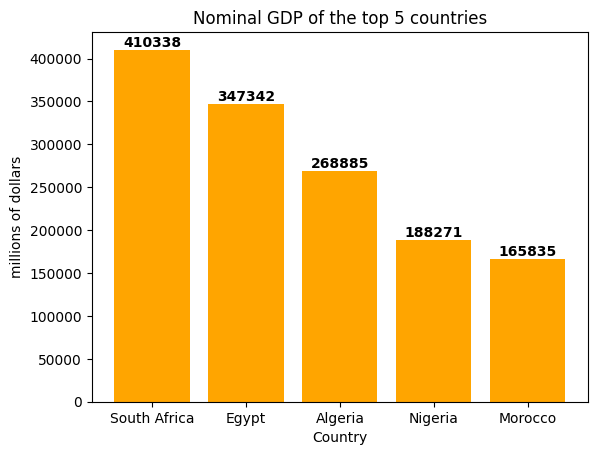

In [61]:
country = top_five['Country']
GDP = top_five['Nominal GDP(million US$)']

plt.bar(country, GDP, color= 'orange')

for i,v in enumerate(top_five['Nominal GDP(million US$)']):
    plt.text(i, v+4000, str(v), ha='center', weight= 'bold', size=10)


plt.title('Nominal GDP of the top 5 countries')
plt.xlabel('Country')
plt.ylabel('millions of dollars')

plt.show()

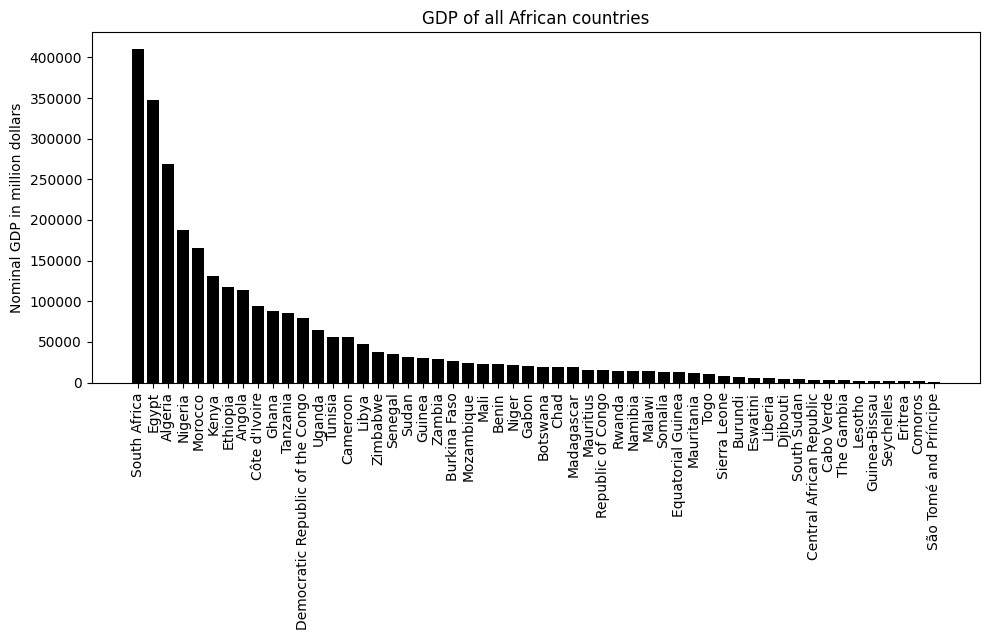

In [53]:
fig, ax = plt.subplots(figsize=(10, 6.5)) 

ax.bar(df['Country'][:-1], df['Nominal GDP(million US$)'][:-1], color='black')

# Tilt x-axis labels
plt.xticks(rotation=90)

ax.set_ylabel('Nominal GDP in million dollars')
ax.set_title('GDP of all African countries')

plt.tight_layout()
plt.show()